## 9. Write a program to compare Support Vector Machine (SVM) and Artificial Neural Network (ANN) on a given dataset.

### SVM:

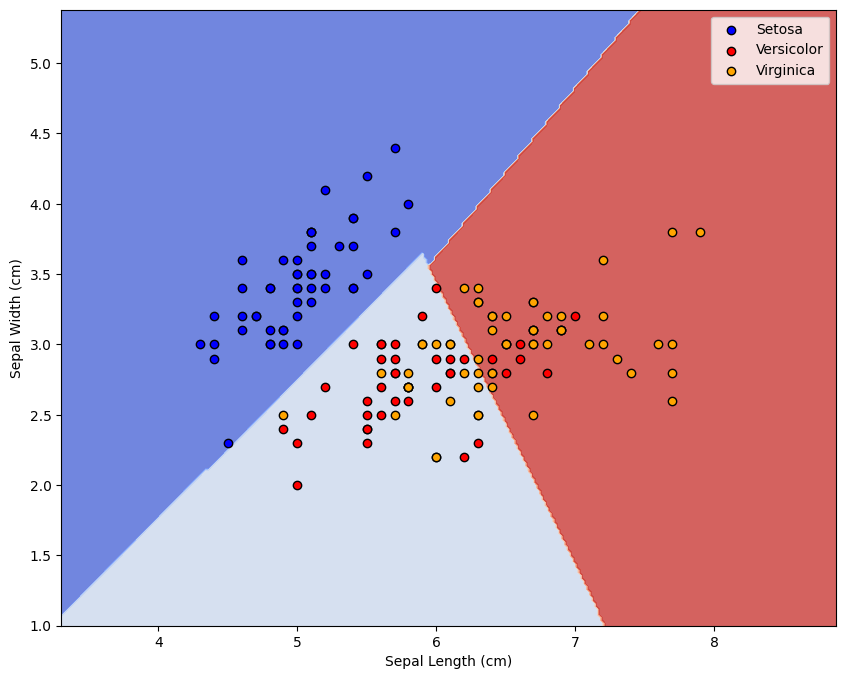

Accuracy Score: 82.00%

Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
x = iris.data[:, :2]
y = iris.target

model = svm.SVC(kernel='linear')
model.fit(x, y)

predictions = model.predict(x)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Setosa', edgecolors='k')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Versicolor', edgecolors='k')
plt.scatter(x[y == 2][:, 0], x[y == 2][:, 1], color='orange', label='Virginica', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

print(f"Accuracy Score: {accuracy_score(y, predictions) * 100:.2f}%")

print("\nConfusion Matrix:")
cm = confusion_matrix(y, predictions)
print(cm)

### ANN:

In [5]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

iris = load_iris()
x = iris.data[:, :2]
y = iris.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)
model.fit(x_scaled, y)

predictions = model.predict(x_scaled)

cm = confusion_matrix(y, predictions)
print("\nConfusion Matrix:")
print(cm)

print("\nWeights between input and hidden layer:")
print(model.coefs_[0])

print("\nBiases of hidden layer:")
print(model.intercepts_[0])

print("\nWeights between hidden and output layer:")
print(model.coefs_[1])

print("\nBiases of output layer:")
print(model.intercepts_[1])

print("\nAccuracy Score:", accuracy_score(y, predictions) * 100)

for i,l in zip(x,predictions):
    print(f"Point{i}=>Predicted Class :{l}")


Confusion Matrix:
[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]

Weights between input and hidden layer:
[[-5.62709449e-01 -6.60777548e-02  7.08623270e-01  6.20658418e-01
   6.24923403e-02 -1.03711612e+00 -1.05224754e+00  8.52649659e-01
   1.45987387e-01  7.29463367e-01]
 [-2.91147696e-01  1.25549703e+00  2.70651427e-02 -2.95013949e-01
  -7.00557080e-01  3.61056489e-04  2.37039042e-01 -3.90046823e-01
  -3.26068281e-01 -1.00638197e+00]]

Biases of hidden layer:
[ 0.10329142  0.05584578  0.37963168  0.17166233  0.43695363  0.60134572
 -0.22439249  0.72165828  0.65300542  0.16500115]

Weights between hidden and output layer:
[[ 0.06837004 -0.32462513 -0.86377465]
 [ 1.26136201  0.08428857  0.09697619]
 [-0.86992393 -0.37953621  0.84817237]
 [-0.47060522 -0.3774366   0.54026246]
 [-1.24226145  0.81163407 -0.19530199]
 [ 0.8459767  -0.28548015 -0.40998264]
 [ 0.77644708 -1.14894653  0.12981466]
 [-0.12856143  1.35870684  0.94631705]
 [-0.28774267  1.01986829 -0.18089518]
 [-1.13720661 -0.43985307  